# Introduction

Schooling has been a rather controversial and touchy subject. Across the board, it feels like test scores for students have been dropping. There have been political arguments on what demographic needs more resources and attention, and potential causes for the drop in scores. But what if we could find a way to highlight a potential student as a low test score risk? What if we could accurately predict a students upcoming exam score, and divert attention and resources to those who predict low? This would be very divisive, as one student who is not predicted to score low does, and if parents find out they did not qualify for additional help could cause an uproar. This would be a very touchy subject and idea to implement, but one I believe could prove vital. If we can accurately predict students scores, we could leave those who are scoring high alone, and could divert the neccessary focus and resources to those who may be silently suffering. Also, we could identify which features are helping those score well, and figure out what schools could do to help those who are struggling to better boost their scores and potentially career and life path. 

Here is the link to kaggle where I got my dataset from. 

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# Data Loading

In [6]:
import pandas as pd

In [7]:
student_records_df = pd.read_csv('StudentPerformanceFactors.csv')
student_records_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Data Preprocessing

In [9]:
student_records_df.duplicated().sum()

0

In [10]:
student_records_df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [11]:
student_records_df.dropna(inplace=True)

In [12]:
student_records_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

This step is important because for a linear regression we need all input data to be variables. So here I am converting the columns with data type object to int64 so that we can include those features into our regression model. Doing so allows all features to be represented and provide input to our model. 

In [14]:
student_records_df['Parental_Involvement'] = student_records_df['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
student_records_df['Access_to_Resources'] = student_records_df['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
student_records_df['Extracurricular_Activities'] = student_records_df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
student_records_df['Motivation_Level'] = student_records_df['Motivation_Level'].map({'Low': 1, 'Medium': 2,'High':3})
student_records_df['Internet_Access'] = student_records_df['Internet_Access'].map({'No': 0, 'Yes': 1})
student_records_df['Family_Income'] = student_records_df['Family_Income'].map({'Low': 1, 'Medium': 2,'High':3})
student_records_df['Teacher_Quality'] = student_records_df['Teacher_Quality'].map({'Low': 1, 'Medium': 2,'High':3})
student_records_df['School_Type'] = student_records_df['School_Type'].map({'Public': 1, 'Private': 2})
student_records_df['Peer_Influence'] = student_records_df['Peer_Influence'].map({'Negative': -1,'Neutral': 0, 'Positive': 1})
student_records_df['Learning_Disabilities'] = student_records_df['Learning_Disabilities'].map({'No': 0, 'Yes': 1})
student_records_df['Parental_Education_Level'] = student_records_df['Parental_Education_Level'].map({'High School': 1, 'College': 2,'Postgraduate':3})
student_records_df['Distance_from_Home'] = student_records_df['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far': 3})
student_records_df['Gender'] = student_records_df['Gender'].map({'Male': 0, 'Female': 1})
student_records_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,1,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1,70


In [15]:
student_records_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Look at mean for each feature. We see there is some large differences in mean value between features. This could signal that we will need to standardize our data to avoid extreme overfitting and allowing larger features to skew the model, potentially causing high error. 

In [17]:
student_records_df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,2.08545,2.098150,0.596896,7.034964,75.066165,1.907965,0.923957,1.495296,1.788021,2.197241,1.304798,0.191753,2.972719,0.104735,1.705394,1.503763,0.421762,67.252117
std,5.985460,11.550723,0.69502,0.698635,0.490560,1.468033,14.400389,0.695758,0.265087,1.233984,0.743526,0.601064,0.460358,0.756394,1.028926,0.306236,0.780570,0.670442,0.493880,3.914217
min,1.000000,60.000000,1.00000,1.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.000000
25%,16.000000,70.000000,2.00000,2.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.00000,2.000000,1.000000,7.000000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,67.000000
75%,24.000000,90.000000,3.00000,3.000000,1.000000,8.000000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,0.000000,2.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,3.00000,3.000000,1.000000,10.000000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,2.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000


# Data Visualization

In [19]:
import seaborn as sbn

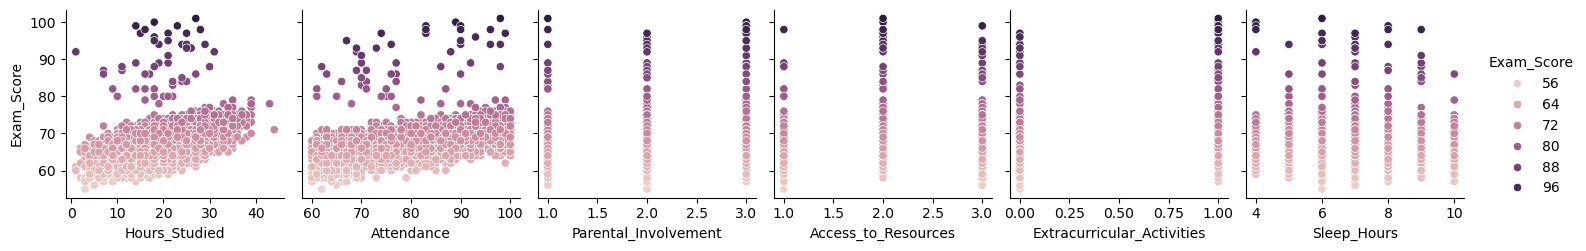

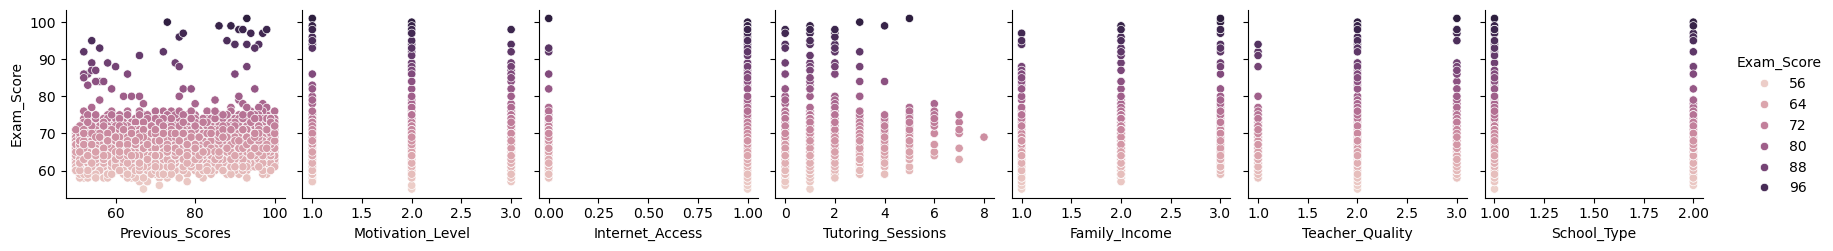

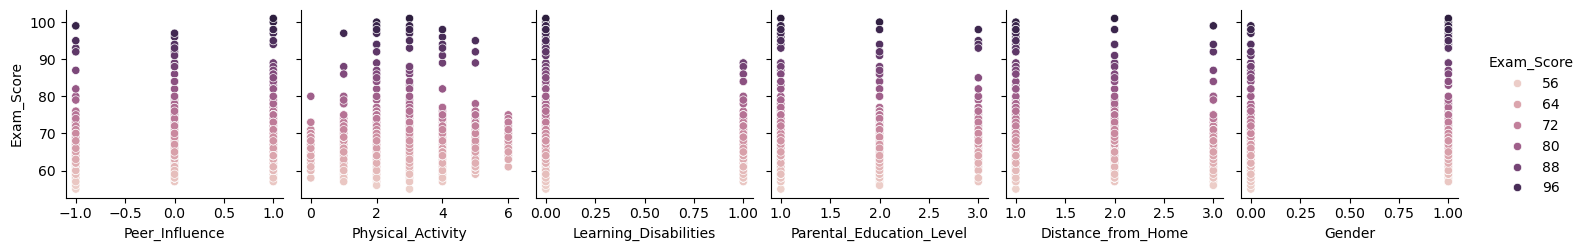

In [20]:
x_columns = student_records_df.drop(columns='Exam_Score').columns
first_third = int(len(x_columns) / 3)
sbn.pairplot(student_records_df, x_vars=x_columns[:first_third], y_vars = 'Exam_Score', hue='Exam_Score')
end = int(len(x_columns))
sbn.pairplot(student_records_df, x_vars=x_columns[first_third: (end- first_third)], y_vars = 'Exam_Score', hue='Exam_Score')
sbn.pairplot(student_records_df, x_vars=x_columns[(end- first_third):], y_vars = 'Exam_Score', hue='Exam_Score')

Looking at these scatterplots, it appears that hourse studied and attendance are the only features to show any sort of linear correlation with exam score.

# Set-Up Test Data

In [23]:
X = student_records_df.drop(columns='Exam_Score')
X.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,1
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1


In [24]:
y = student_records_df['Exam_Score']
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=.3, random_state=42)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

((4464, 19), (1914, 19), (4464,), (1914,))

# Experiment 1: No Standardization

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

In [29]:
model_1 = SGDRegressor()

model_1.fit(X_trn, y_trn)

SGDRegressor()

In [30]:
trn_pred = model_1.predict(X_trn)
tst_pred = model_1.predict(X_tst) 

In [31]:
trn_mse = mse(y_trn, trn_pred)
tst_mse = mse(y_tst, tst_pred)
print('Train MSE: %.6f' % trn_mse)
print('Test MSE: %.6f' % tst_mse)

Train MSE: 4700207506892425825091584.000000
Test MSE: 4705097728756681499738112.000000


With so much error, this model using un-standardized error is simply unusable. We cannot in good faith even entertain using this model with this sort of data. We will need to see if by standardizing the input data we can have more accurate model. 

# Experiment 2: Standardization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_trn_scaled = scaler.fit_transform(X_trn)

In [36]:
pd.DataFrame(X_trn_scaled, columns=X_trn.columns)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.834598,-1.561210,-0.124387,-1.553182,-1.206418,-0.716592,-0.975781,1.584684,0.282072,-0.402090,0.268701,-0.318918,-0.649002,1.079704,0.995515,-0.340588,1.648817,0.743726,1.177780
1,0.667626,-0.607719,-0.124387,-0.131820,0.828900,-0.036561,1.656133,0.147165,0.282072,1.218614,0.268701,1.344225,1.540828,-0.246603,0.027750,-0.340588,-0.908625,-0.745060,1.177780
2,0.834598,-0.260995,-0.124387,-1.553182,0.828900,0.643470,-0.698737,1.584684,-3.545192,-1.212442,0.268701,-0.318918,-0.649002,1.079704,1.963280,-0.340588,0.370096,2.232513,1.177780
3,-1.336037,-0.000951,1.321607,1.289542,0.828900,2.003532,1.171306,1.584684,0.282072,-0.402090,1.614920,1.344225,-0.649002,1.079704,0.027750,-0.340588,1.648817,0.743726,-0.849055
4,0.500654,-0.000951,-1.570380,1.289542,-1.206418,-0.716592,-0.837259,-1.290354,0.282072,-1.212442,1.614920,-0.318918,1.540828,1.079704,-0.940016,-0.340588,-0.908625,-0.745060,-0.849055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,1.669457,-0.867762,1.321607,-1.553182,-1.206418,-0.716592,0.617219,1.584684,0.282072,0.408262,0.268701,-0.318918,-0.649002,1.079704,0.027750,-0.340588,1.648817,-0.745060,-0.849055
4460,0.667626,0.865859,-1.570380,-1.553182,0.828900,1.323501,1.517611,1.584684,0.282072,1.218614,-1.077518,-0.318918,-0.649002,1.079704,0.995515,-0.340588,-0.908625,-0.745060,-0.849055
4461,0.667626,-1.301167,-1.570380,1.289542,0.828900,-0.036561,-1.599129,0.147165,0.282072,-0.402090,1.614920,-0.318918,-0.649002,-0.246603,-1.907781,-0.340588,1.648817,0.743726,1.177780
4462,1.669457,0.952540,-0.124387,1.289542,0.828900,-0.036561,1.379089,-1.290354,0.282072,-0.402090,0.268701,1.344225,-0.649002,1.079704,0.027750,-0.340588,0.370096,-0.745060,1.177780


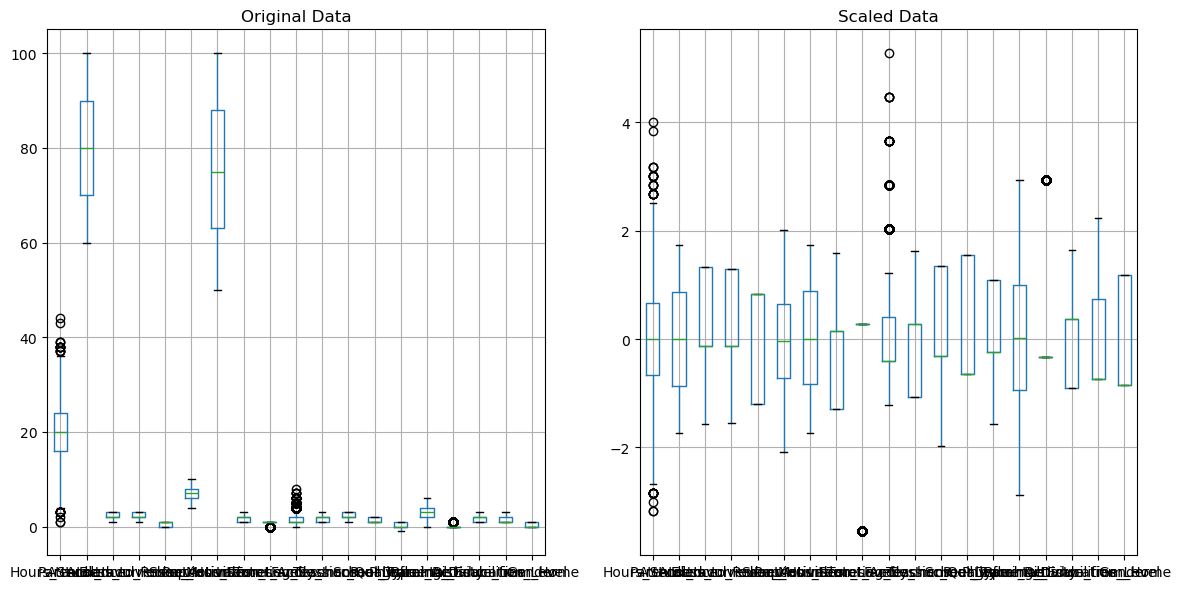

In [37]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pd.DataFrame(X_trn, columns=X_trn.columns).boxplot(ax=axes[0])
axes[0].set_title('Original Data')
pd.DataFrame(X_trn_scaled, columns=X_trn.columns).boxplot(ax=axes[1])
axes[1].set_title('Scaled Data')
plt.tight_layout()
plt.show()

In [38]:
model_2 = SGDRegressor()
model_2.fit(X_trn_scaled, y_trn)

SGDRegressor()

In [39]:
X_tst_scaled = scaler.fit_transform(X_tst)
pred = model_2.predict(X_tst_scaled)

In [40]:
tst_mse = mse(y_tst, pred)
tst_rmse = rmse(y_tst, pred)
tst_r2 = r2(y_tst, pred)
tst_mse, tst_rmse, tst_r2

(4.056583629696821, 2.0140962314886597, 0.7348562141006962)